In [50]:
from visualisation import visualise_features, visualise_dataset
from utilities import load_dataframe, performance, cross_validation_feature_params

In [51]:
# Restart the kernel if needed
# import os
# os._exit(00)

### Visualise our data

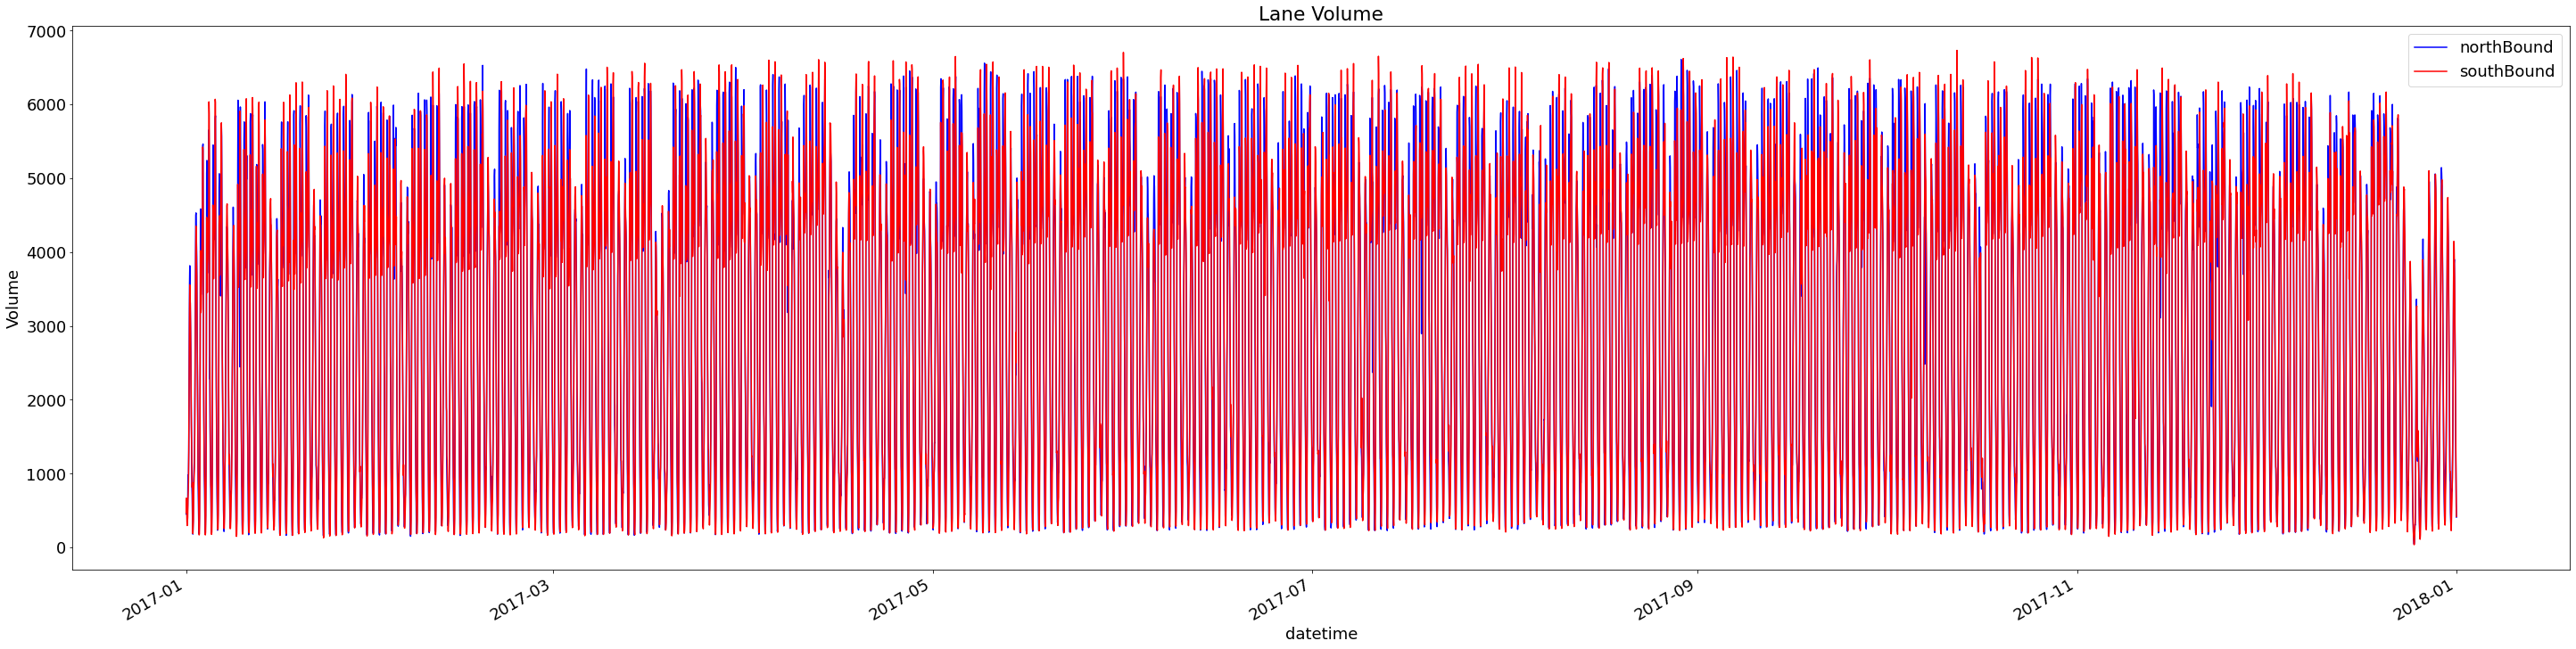

In [52]:
# Get our dataframe
df = load_dataframe()
visualise_dataset(df)

In [53]:
# Create two separate data frames, one for each junction
df_north = df.drop(columns=["southBound"])
df_south = df.drop(columns=["northBound"])

### Base Features

Base MSE for northBound traffic is: 492.2034548495725
Base MSE for southBound traffic is: 484.267202869695


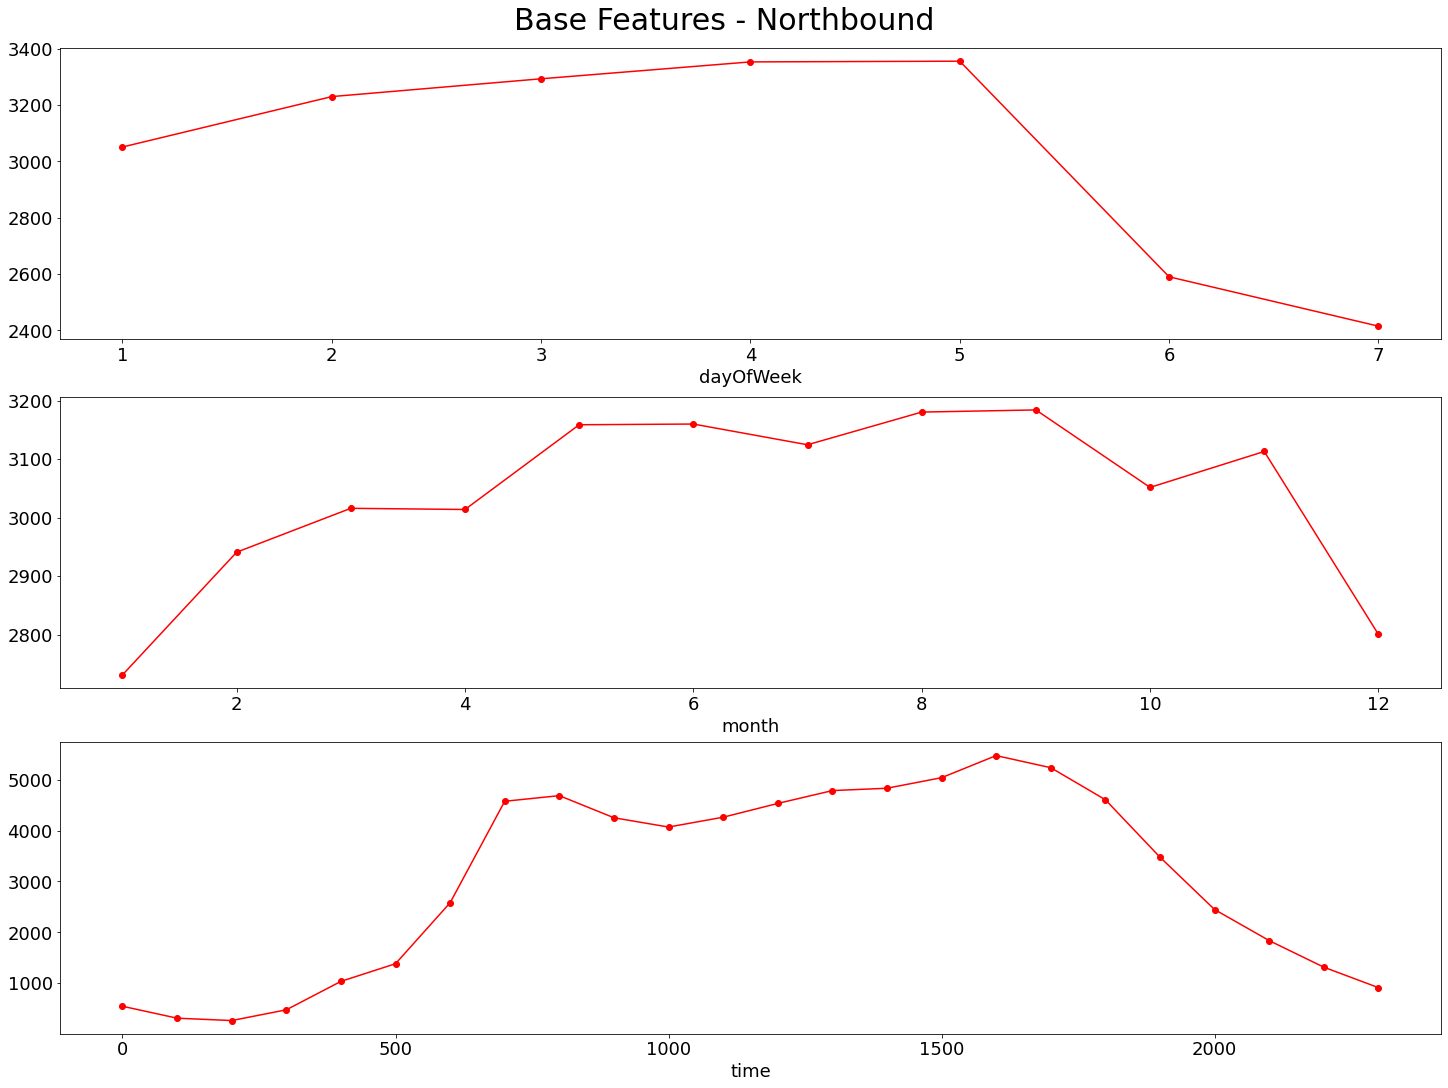

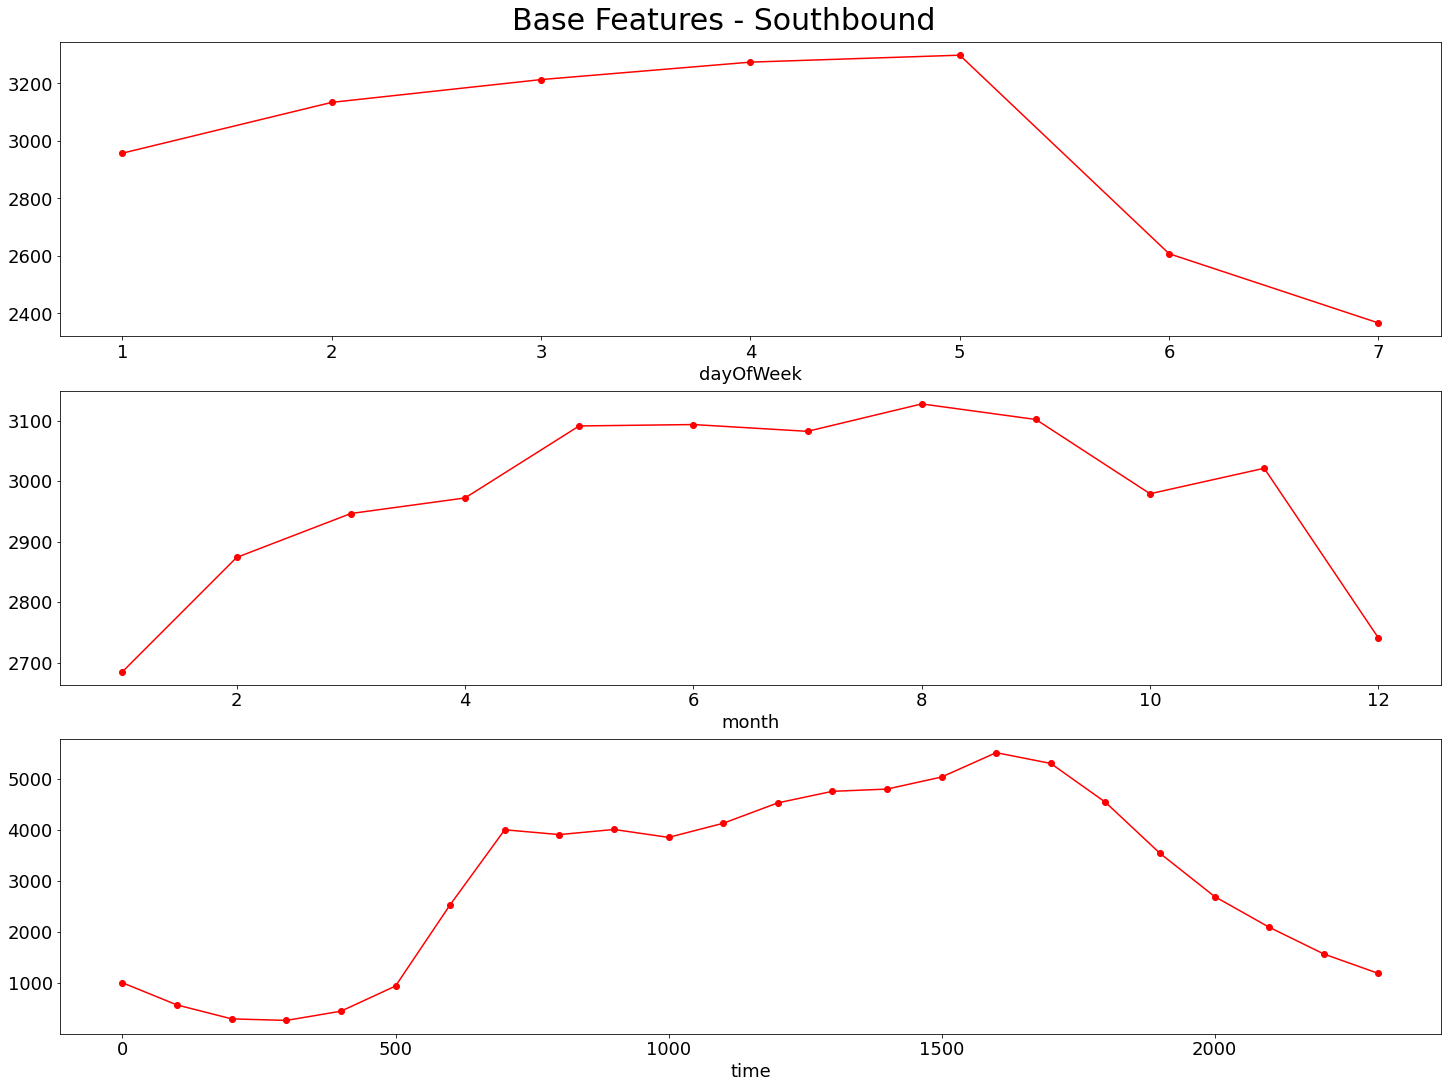

In [54]:
# Base features performance, where we use K Nearest Neighbors.
# Here is our baseline, now we add features.
performance(df_north, "northBound")
visualise_features(["dayOfWeek", "month", "time"], df_north, f"Base Features - Northbound", "northBound")

performance(df_south, "southBound")
visualise_features(["dayOfWeek", "month", "time"], df_south, f"Base Features - Southbound", "southBound")

### We see:
1. A weekly seasonality
2. A yearly seasonality
3. No overall trend throughout the year

### Extra Features

In [55]:
df_north["quarter"] = df.index.quarter
df_north["weekOfYear"] = df.index.weekofyear
df_north["dayOfYear"] = df.index.dayofyear

df_south["quarter"] = df.index.quarter
df_south["weekOfYear"] = df.index.weekofyear
df_south["dayOfYear"] = df.index.dayofyear

/tmp/ipykernel_23342/3101943268.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_north["weekOfYear"] = df.index.weekofyear
/tmp/ipykernel_23342/3101943268.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_south["weekOfYear"] = df.index.weekofyear


Base MSE for northBound traffic is: 835.9157728696507
Base MSE for southBound traffic is: 787.1092354789519


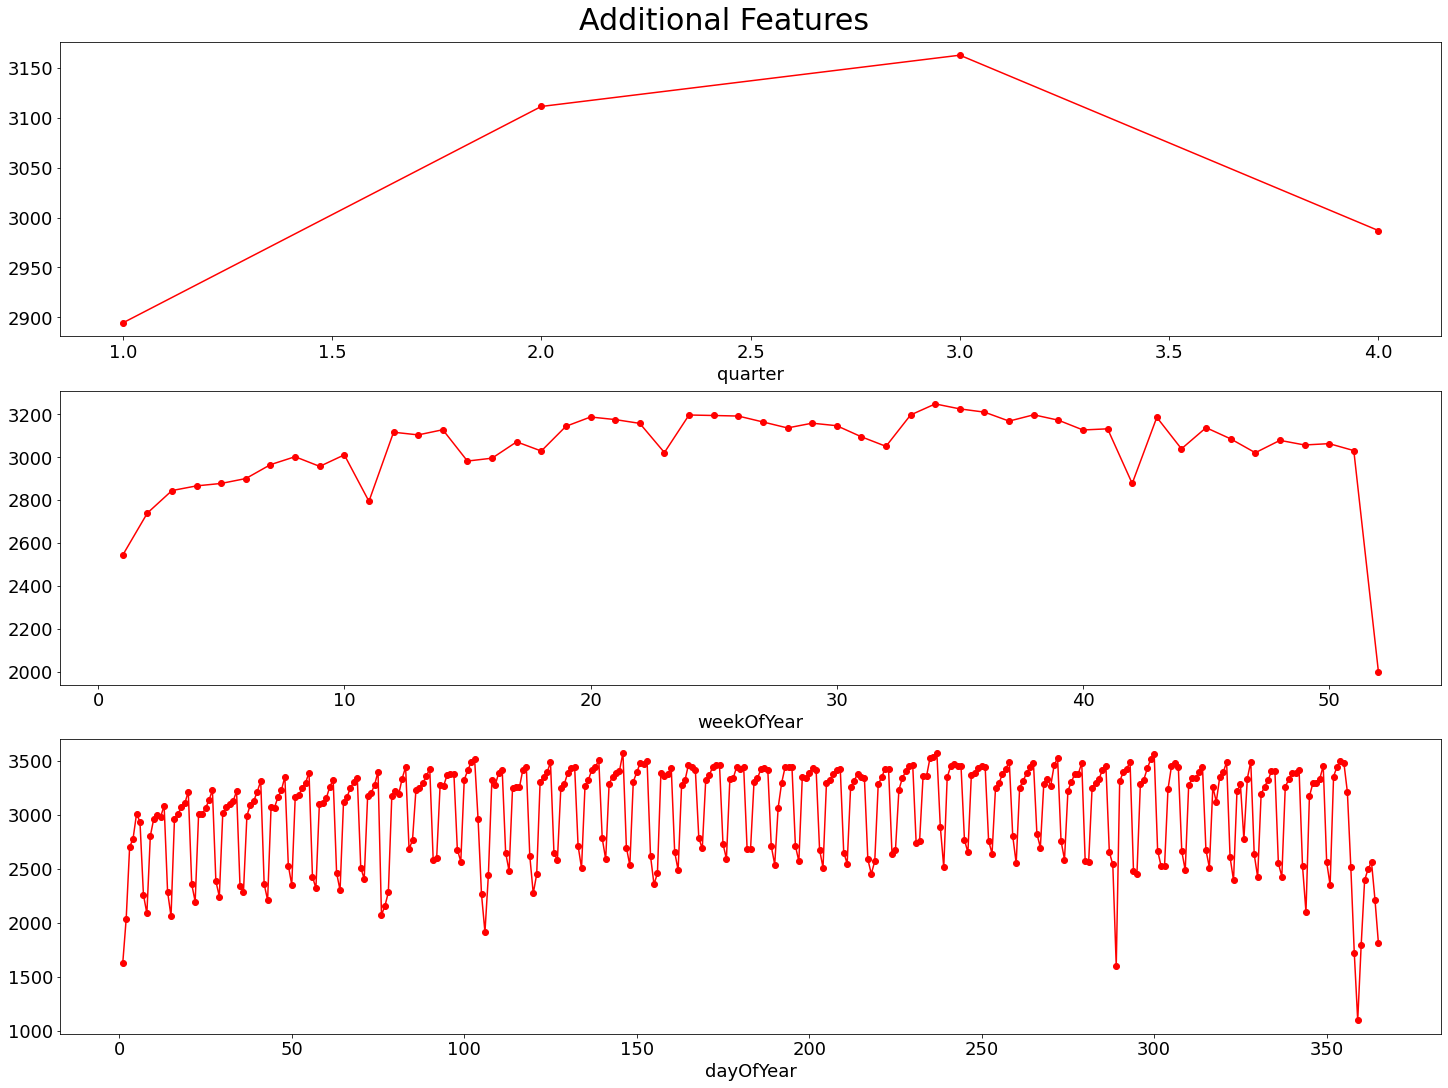

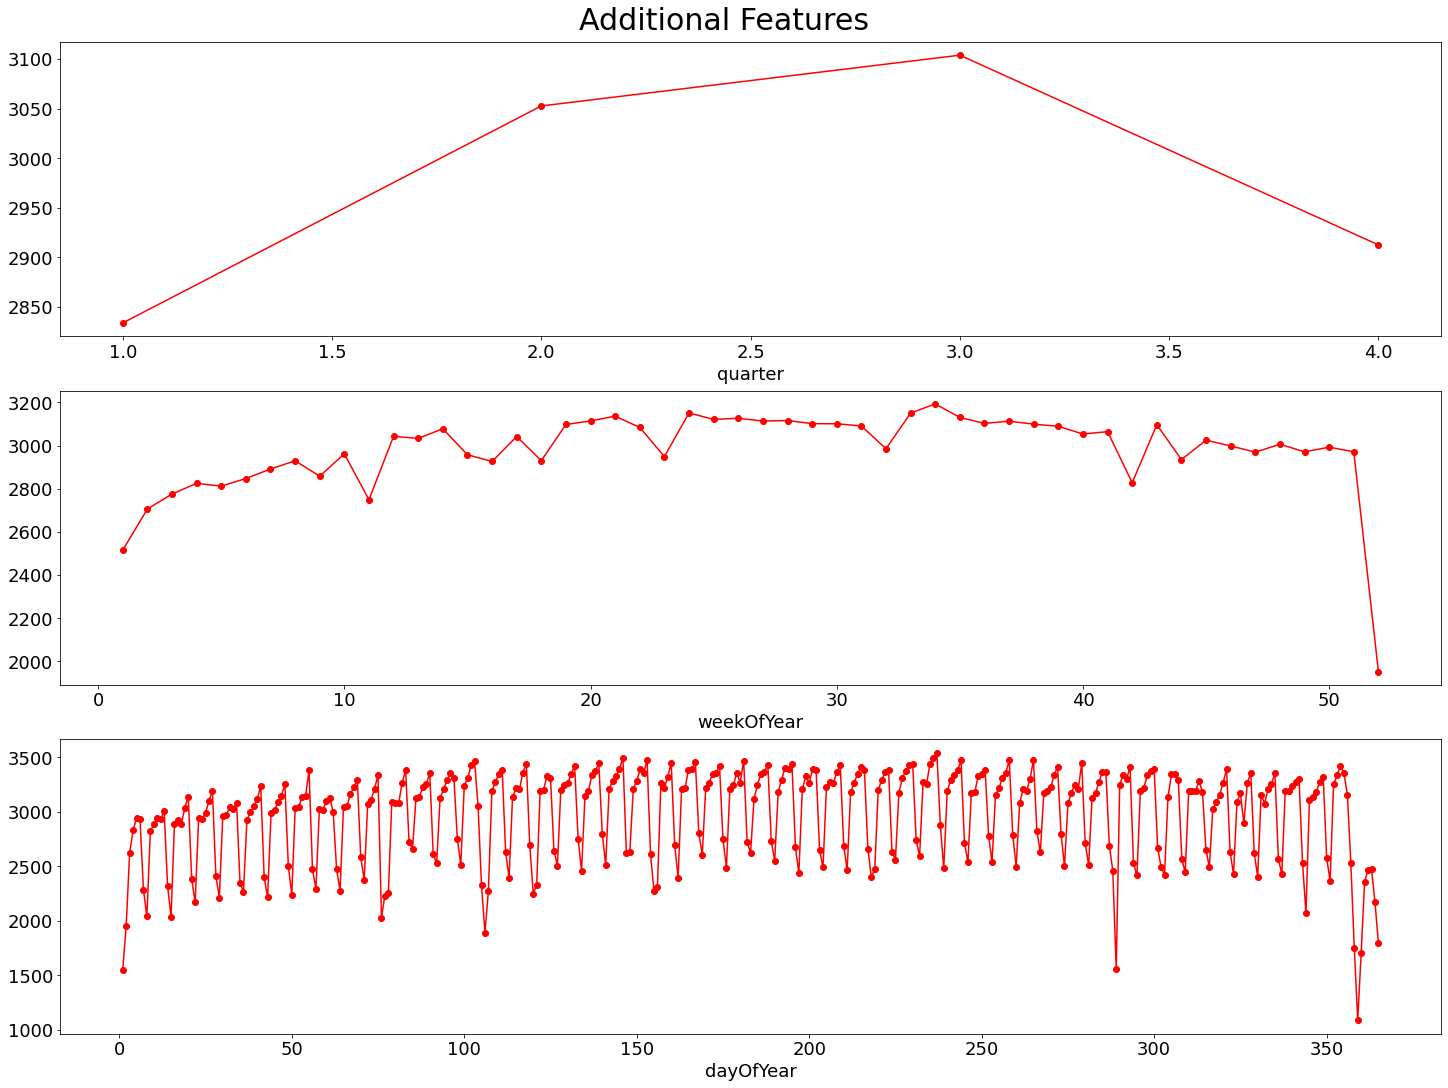

In [56]:
performance(df_north, "northBound")
visualise_features(["quarter", "weekOfYear", "dayOfYear"], df_north, "Additional Features", "northBound")


performance(df_south, "southBound")
visualise_features(["quarter", "weekOfYear", "dayOfYear"], df_south, "Additional Features", "southBound")

### Review:
Looks like our base features do best.
Newer features perform quite poorly, though this could be because we have such a small dataset right now.

In [57]:
# Get our dataframes back to original features by running cell towards top
df_north = df.drop(columns=["southBound"])
df_south = df.drop(columns=["northBound"])

### Create lagging features
#### Need to encode components of time series data such as seasonality, trend and cycles.

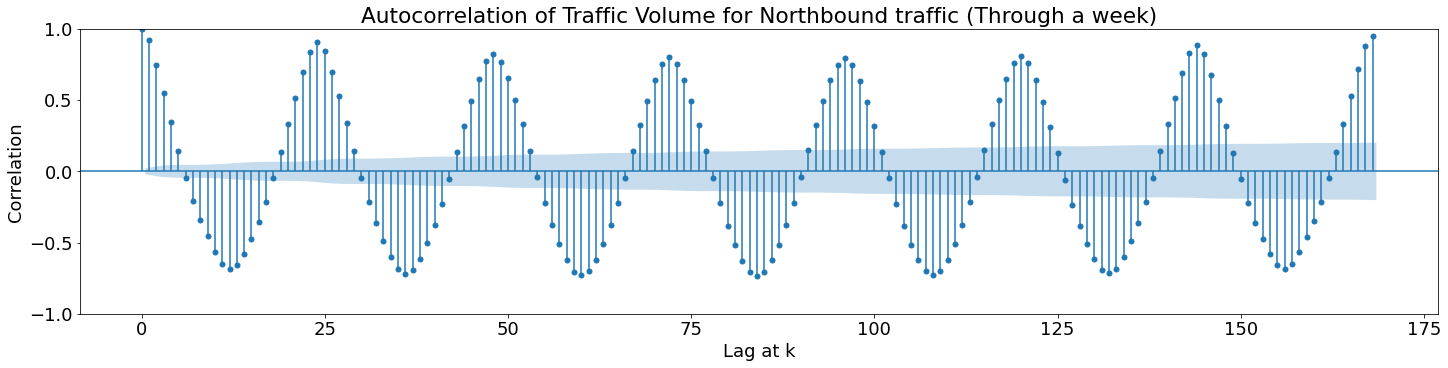

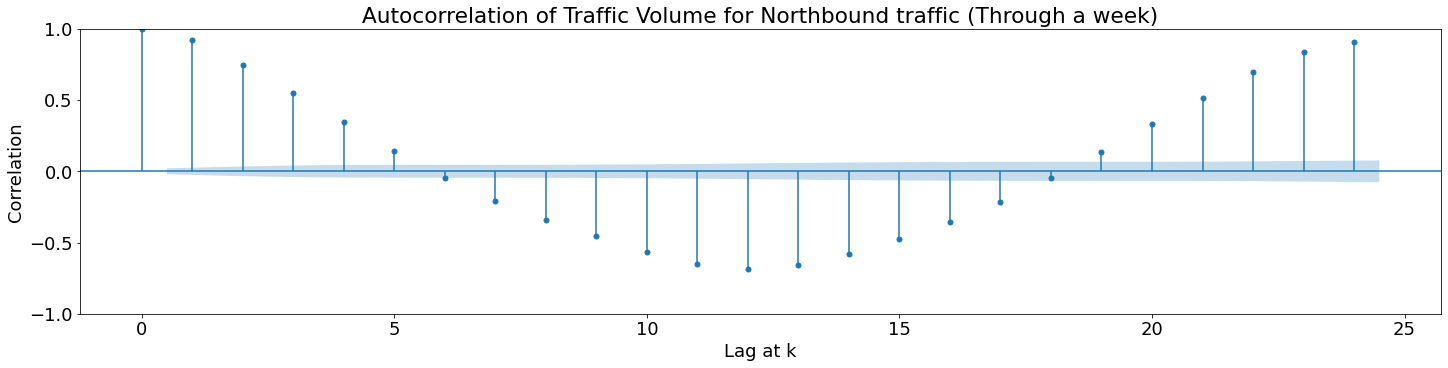

In [58]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

rcParams["figure.figsize"] = 20, 5
fig = plot_acf(df_north["northBound"], lags=168)

plt.title("Autocorrelation of Traffic Volume for Northbound traffic (Through a week)")
plt.ylabel("Correlation")
plt.xlabel("Lag at k")
fig.show()

rcParams["figure.figsize"] = 20, 5
fig = plot_acf(df_north["northBound"], lags=24)

plt.title("Autocorrelation of Traffic Volume for Northbound traffic (Through a week)")
plt.ylabel("Correlation")
plt.xlabel("Lag at k")
fig.show()

Base MSE for northBound traffic is: 325.0449797271534


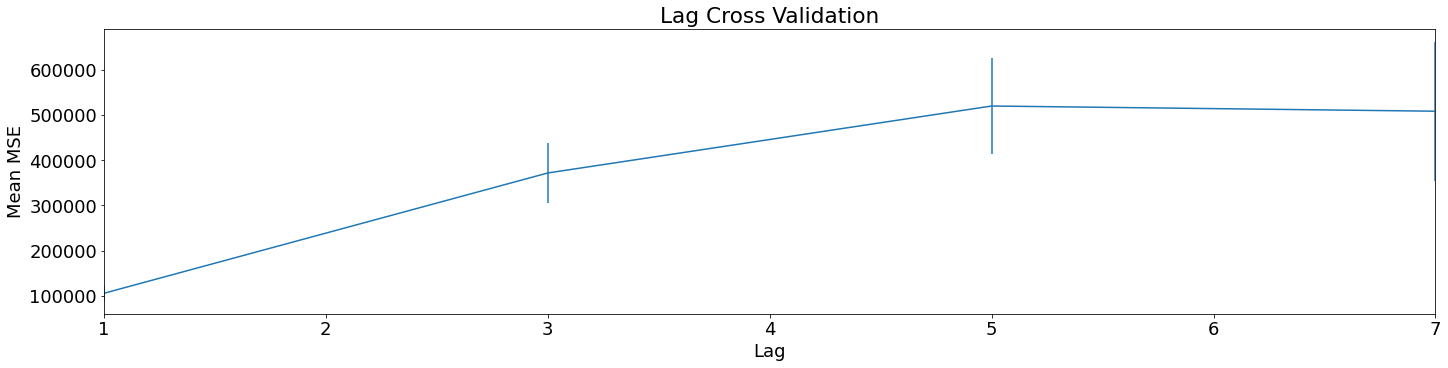

In [59]:
temp = df_north.copy()
cross_validation_feature_params(test_params=[1,3,5,7], df=temp, feature_type="lag", target_var="northBound")

df_north = df.drop(columns=["southBound"])
df_north["volume_lag_1"] = df_north["northBound"].shift(1, fill_value=0)
performance(df_north, "northBound")

df_south = df.drop(columns=["northBound"])
df_south["volume_lag_1"] = df_south["southBound"].shift(1, fill_value=0)
# performance(df_south, "southBound")




### Some improvement when using a lag of 1. Anything higher results in pretty poor results, Let's try a Rolling Window Feature
#### For this, we'll try the mean, min, max, and sum in each window.

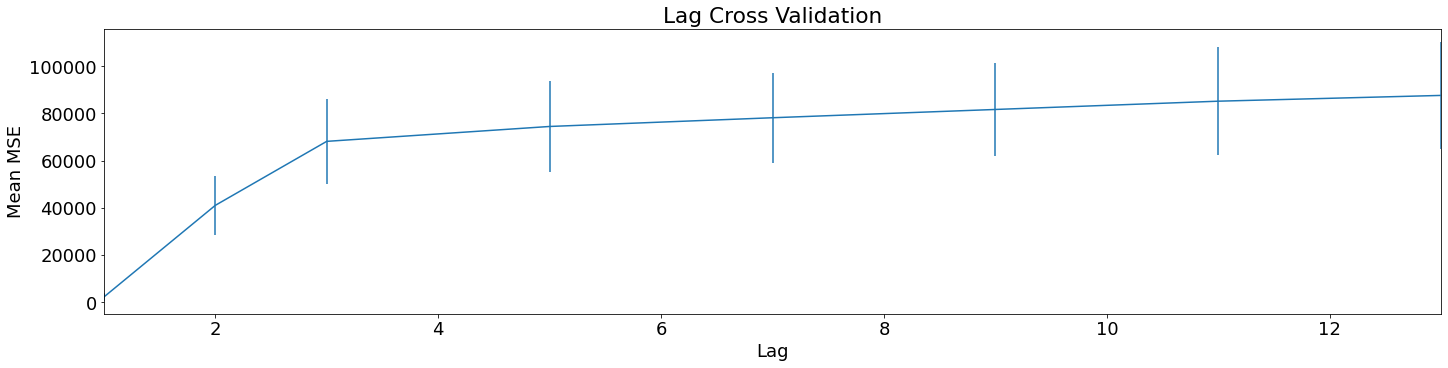

In [60]:
temp = df_north.copy()
# cross_validation_feature_params(test_params=[3,5,7,9,11,13], df=df_north, feature_type="rolling_window_mean", target_var="northBound")
cross_validation_feature_params(test_params=[1,2,3,5,7,9,11,13], df=temp, feature_type="rolling_window_max", target_var="northBound")
# cross_validation_feature_params(test_params=[3,5,7,9,11,13], df=df_north, feature_type="rolling_window_min", target_var="northBound")




So that's interesting.
Let's do some plots to see how correlated these features are.

In [61]:

# df_north['window_max'] = df_north['northBound'].rolling(window = 1).max()
# df_north['window_max'] = df_north['window_max'].fillna(0)
# performance(df_north, "northBound")

# df_south['window_max'] = df_south['northBound'].rolling(window = 1).max()
# df_south['window_max'] = df_south['window_max'].fillna(0)
# performance(df_south, "northBound")

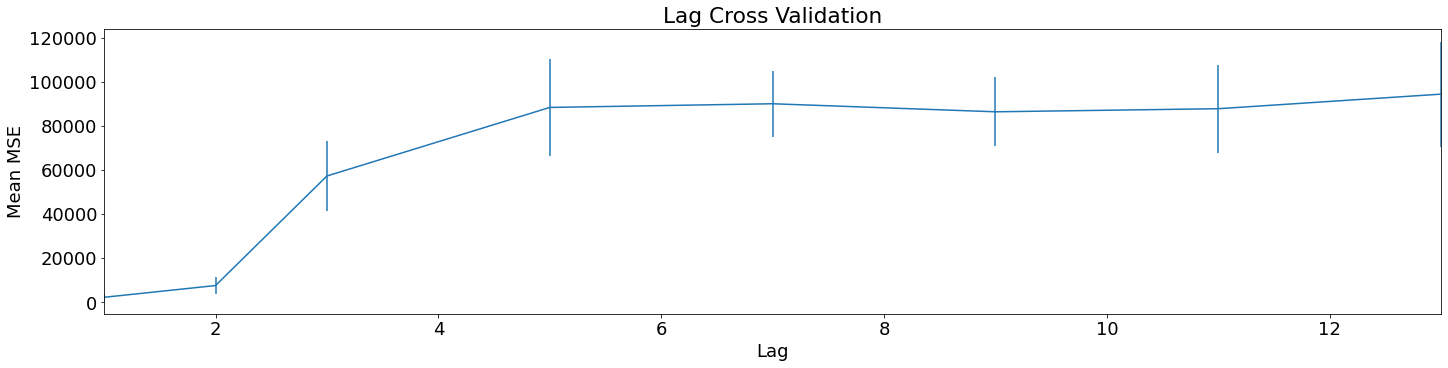

In [62]:
temp = df_north.copy()
cross_validation_feature_params(test_params=[1,2,3,5,7,9,11,13], df=temp, feature_type="rolling_window_mean", target_var="northBound")
# df_north['window_mean'] = df_north['northBound'].rolling(window = 1).mean()
# df_north['window_mean'] = df_north['window_mean'].fillna(0)
# performance(df_north, "northBound")

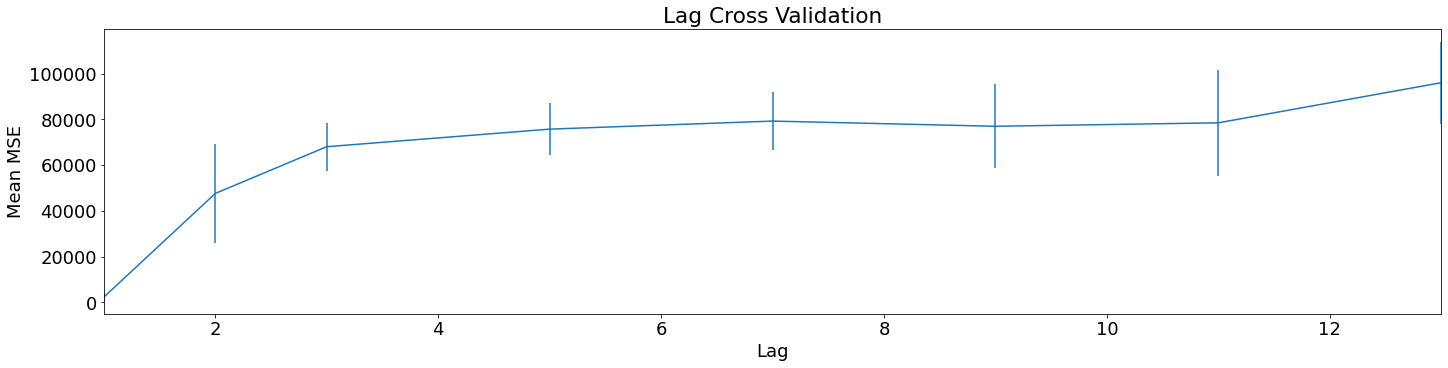

In [63]:
temp = df_north.copy()
cross_validation_feature_params(test_params=[1,2,3,5,7,9,11,13], df=temp, feature_type="rolling_window_min", target_var="northBound")
# df_north['window_min'] = df_north['northBound'].rolling(window = 1).mean()
# df_north['window_min'] = df_north['window_min'].fillna(0)
# performance(df_north, "northBound")

Error getting much better!

In [72]:
temp = df_north.copy()
performance(temp, "northBound")
temp['window_max'] = temp['northBound'].rolling(window = 2).max()
temp['window_max'] = temp['window_max'].fillna(0)
performance(temp, "northBound")
temp['window_mean'] = temp['northBound'].rolling(window = 2).mean()
temp['window_mean'] = temp['window_mean'].fillna(0)
performance(temp, "northBound")
temp['window_min'] = temp['northBound'].rolling(window = 2).min()
temp['window_min'] = temp['window_min'].fillna(0)
performance(temp, "northBound")
temp.head(10)


Base MSE for northBound traffic is: 325.0449797271534
Base MSE for northBound traffic is: 202.54536471293227
Base MSE for northBound traffic is: 75.31352310520967
Base MSE for northBound traffic is: 55.45805765265621


,dayOfWeek,month,time,northBound,volume_lag_1,window_max,window_mean,window_min
datetime,,,,,,,,
2017-01-01 00:00:00,7,1,0,451,0,0.0,0.0,0.0
2017-01-01 01:00:00,7,1,100,652,451,652.0,551.5,451.0
2017-01-01 02:00:00,7,1,200,527,652,652.0,589.5,527.0
2017-01-01 03:00:00,7,1,300,462,527,527.0,494.5,462.0
2017-01-01 04:00:00,7,1,400,514,462,514.0,488.0,462.0
2017-01-01 05:00:00,7,1,500,466,514,514.0,490.0,466.0
2017-01-01 06:00:00,7,1,600,571,466,571.0,518.5,466.0
2017-01-01 07:00:00,7,1,700,979,571,979.0,775.0,571.0
2017-01-01 08:00:00,7,1,800,916,979,979.0,947.5,916.0


In [73]:
temp = df_north.copy()
performance(temp, "northBound")
temp['window_max'] = temp['northBound'].rolling(window = 1).max()
temp['window_max'] = temp['window_max'].fillna(0)
performance(temp, "northBound")
temp['window_mean'] = temp['northBound'].rolling(window = 1).mean()
temp['window_mean'] = temp['window_mean'].fillna(0)
performance(temp, "northBound")
temp['window_min'] = temp['northBound'].rolling(window = 1).min()
temp['window_min'] = temp['window_min'].fillna(0)
performance(temp, "northBound")
temp.head(10)

Base MSE for northBound traffic is: 325.0449797271534
Base MSE for northBound traffic is: 47.031718732738916
Base MSE for northBound traffic is: 37.48546263001441
Base MSE for northBound traffic is: 32.94808342427988


,dayOfWeek,month,time,northBound,volume_lag_1,window_max,window_mean,window_min
datetime,,,,,,,,
2017-01-01 00:00:00,7,1,0,451,0,451.0,451.0,451.0
2017-01-01 01:00:00,7,1,100,652,451,652.0,652.0,652.0
2017-01-01 02:00:00,7,1,200,527,652,527.0,527.0,527.0
2017-01-01 03:00:00,7,1,300,462,527,462.0,462.0,462.0
2017-01-01 04:00:00,7,1,400,514,462,514.0,514.0,514.0
2017-01-01 05:00:00,7,1,500,466,514,466.0,466.0,466.0
2017-01-01 06:00:00,7,1,600,571,466,571.0,571.0,571.0
2017-01-01 07:00:00,7,1,700,979,571,979.0,979.0,979.0
2017-01-01 08:00:00,7,1,800,916,979,916.0,916.0,916.0


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import TimeSeriesSplit
neighbors_model = KNeighborsRegressor(weights="distance")

training_size = int(len(temp)*0.90)
data_len = len(temp)
train, test = temp[0:training_size],temp[training_size:data_len]
train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)

Xtrain = train.drop

X = df.drop(target_var, axis=1)
y = df[target_var]